In [4]:
import sys
sys.path.append("..")
import datetime

from src.helper import make_ts

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 3.1 Simple forecasting methods

### Average Method:

The forecasts of all future values are equal to the average of the historical data:


$\hat{y}_{T+h|T}=\bar{y}=(y_{1}+..+y_{T})/T$

In [5]:
ts_df = make_ts('2000',20)

In [6]:
ts_df.head()

,Observation
Year,
2000-01-01,59.884216
2001-01-01,7.201886
2002-01-01,79.705551
2003-01-01,70.163380
2004-01-01,34.096441


In [55]:
def average_forecast(y, h):
    """
    y = time series index of pandas data frame
    h = forecast horizon
    """
    ts = pd.DataFrame(pd.date_range(
                                        str(ts_df.index[-1] + datetime.timedelta(days=365)), 
                                        periods = h, 
                                        freq=pd.infer_freq(y.index)
                                        ), 
                      columns = ['Year']
                     )
    ts['Forecast'] = y['Observation'].mean()
    ts.set_index('Year', inplace = True)
    return ts

In [56]:
ts_df['Observation'].mean()

36.700709307416034

In [57]:
str(ts_df.index[-1] +datetime.timedelta(days=365))

'2020-01-01 00:00:00'

In [58]:
frequency = pd.infer_freq(ts_df.index)
print(frequency)

AS-JAN


In [59]:
y = pd.DataFrame(pd.date_range(str(ts_df.index[-1]), periods = 10, freq=frequency), columns = ['Year'])

In [60]:
forecast = average_forecast(ts_df, 10)

In [61]:
forecast

,Forecast
Year,
2020-01-01,36.700709
2021-01-01,36.700709
2022-01-01,36.700709
2023-01-01,36.700709
2024-01-01,36.700709
2025-01-01,36.700709
2026-01-01,36.700709
2027-01-01,36.700709
2028-01-01,36.700709


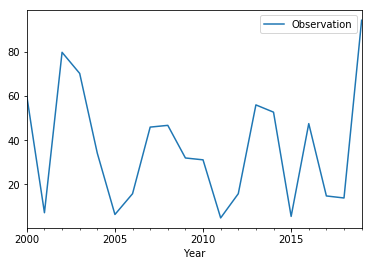

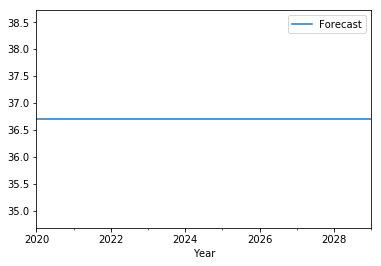

In [65]:
ts_df.plot()
forecast.plot()